# FargoCPT Quickstart

This notebook guides you through how to make the code, run a simulation and plot the results.

First we create a new directory and change to it.

In [1]:
example_name = "100_quickstart"
example_dir = f"example_dirs/{example_name}"
import os
if not os.path.basename(os.getcwd()) == example_name:
    !mkdir -p $example_dir
    os.chdir(example_dir)
repo_root = os.path.abspath(os.path.join(os.getcwd(), "../../../"))
print(f"Current working directory: {os.getcwd()}")
print(f"Repository root directory: {repo_root}")

Current working directory: /home/rometsch/repo/fargocpt/examples/example_dirs/100_quickstart
Repository root directory: /home/rometsch/repo/fargocpt


## Make the code

Make sure the code is built by running make again.

If you have not yet compiled the go, please go to the readme and follow the instructions there.
You can also try to run the following cell directly, but it will only output error messages. This might make debugging harder.

In [2]:
%%timeit -n1 -r1
from sys import platform
if platform in ["linux", "darwin"]:
    !make -j 4 -C $repo_root/src > make.log
else:
    raise RuntimeError(f"Seems like you are not running MacOS or Linux but {platform}. This is unsupported. You are on your own, good luck!")

115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Preparing a setup file

We'll take the example setup file from the examples directory and modify it in python.
If you want to create setup files for a parameter study, just copy the code and make your own setup creator script.

In [3]:
configfile = "setup.yml"
!cp $repo_root/examples/config.yml $configfile

We'll use the `ruamel.yaml` package to read and write the setup file. This can be set up to preserve comments which is very useful if you want to trace your decisions later on.

In [4]:
try:
    import ruamel.yaml
except ImportError:
    raise ImportError("Please install ruamel.yaml with `python3 -m pip install ruamel.yaml`")
yaml = ruamel.yaml.YAML()
with open(configfile, "r") as infile:
    config = yaml.load(infile)

In [5]:
config["nbody"][1]["accretion efficiency"] = "2"
config["MonitorTimestep"] = 0.314 # monitor scalar files around every half orbit
config["Nmonitor"] = 20 # write a snapshot after every 20 monitor timesteps = every orbit
config["Nsnapshots"] = 10 # wirte 10 snapshots
# use very low resolution by setting it to 2 cell per scaleheight, cps
config["cps"] = 2

with open(configfile, "w") as outfile:
    yaml.dump(config, outfile)

## Running the code

We can start fargo using the python interface.

For a production, uncomment the following cell and copy the command to your start script.

In [6]:
# cwd = os.getcwd()
# cmd = f"cd {cwd} && python3 ../../../run_fargo -np 1 -nt 4 auto {configfile}"
# print(cmd)

Here, we just launch the code from within the notebook.

Note the `detach=False` parameter.
Here, we use `detach=False` to see the output in the notebook.
You can also use `detach=True` to run the simulation in the background and continue to use the notebook while the simulation is running.

In [7]:
from fargocpt import run
np = 2 # Number of mpi processes. Should be equal to the number of numa nodes on your machine, check your cluster docu or run `lscpu` or `./run_fargo --print-numa` if you're on linux.
nt = 1 # Number of threads per mpi process, set it to the number of cores you want to use / number of MPI processes
run(["start", configfile], np=np, nt=nt, exe=repo_root+"/bin/fargocpt_exe", detach=False)

Running command: mpirun -np 2 --report-pid /tmp/tmpyyu0scqg -x OMP_NUM_THREADS=1 /home/rometsch/repo/fargocpt/bin/fargocpt_exe start setup.yml
fargo process pid 1409397

[0] MPI rank #  0 runs as process 1409401
[1] MPI rank #  1 runs as process 1409402
[0] MPI rank #  0 OpenMP thread #  0 of  1 on cpt-kamino
[1] MPI rank #  1 OpenMP thread #  0 of  1 on cpt-kamino
[0] fargo: This file was compiled on Nov 14 2023, 12:56:40.
[0] fargo: This version of FARGO used _GNU_SOURCE
[0] fargo: This version of FARGO used NDEBUG. So no assertion checks!
[0] Using parameter file setup.yml
[0] Computing disk quantities within 5.00000e+00 L0 from coordinate center
[0] BC: Inner composite = reflecting
[0] BC: Outer composite = reflecting
[0] BC: Sigma inner = zerogradient
[0] BC: Sigma outer = zerogradient
[0] BC: Energy inner = zerogradient
[0] BC: Energy outer = zerogradient
[0] BC: Vrad inner = reflecting
[0] BC: Vrad outer = reflecting
[0] BC: Vaz inner = keplerian
[0] BC: Vaz outer = keplerian
[0

0

Following is an overview widget for the simulation. You can use the slider to scrub through the different snapshots.

Run the cell again to refresh the snapshot list.

Uncomment the first line for an interactive widget. Your Jupyter environment must support this.

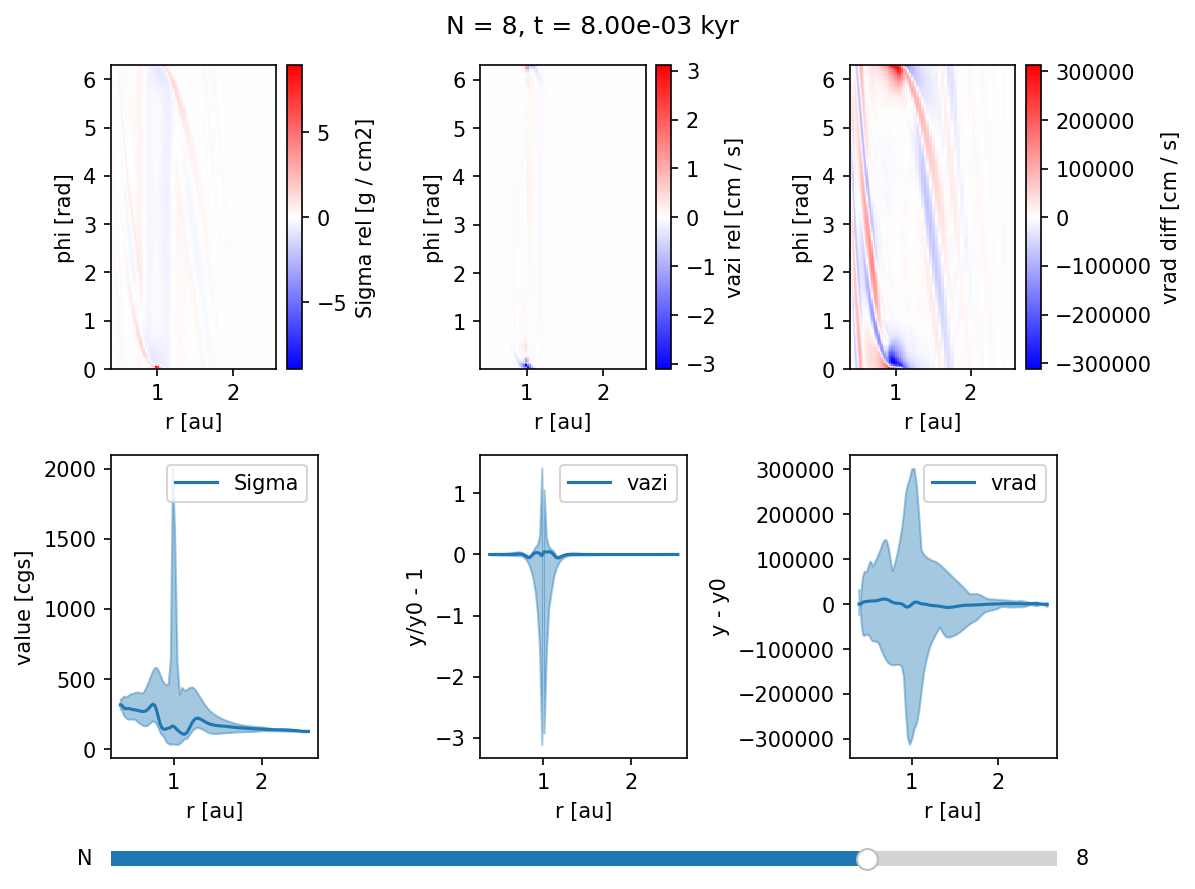

In [4]:
# %matplotlib widget
from fargocpt import Overview
overview = Overview("output/out/", 
                    vars=["2:Sigma:rel,rphi",
                          "2:vazi:rel,rphi",
                          "2:vrad:diff,rphi",
                          "1:Sigma:minmax",
                          "1:vazi:rel,minmax",
                          "1:vrad:diff,minmax"],
                          start=8)
overview.create();

Concratulations! You've made it through the quickstart guide.
You should now know enough to run your own experiments using the FargoCPT code.
Happy experimenting!